### Project King County Housing Dataset - EDA & Visualization

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Lets's load our Dataset

df = pd.read_csv(r"C:\Users\mites\Desktop\Ironhack\Week5\Day3\Project Data science and ML\king_ country_ houses_aa.csv")
print("Shape:", df.shape) #.shape gives (rows, columns) so you know dataset size.

display(df.head()) #.head() shows column names and sample rows so you can confirm file structure and spot obvious issues (weird column names, encoding problems).

Shape: (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Basic Info for the Dataset .info(), missing values, duplicates

df.info() # .info() shows column types (int, float, object), memory usage and non-null counts. This helps detect columns that should be numeric but are strings

print(df.isnull().sum()) # isnull().sum() reveals missing data per column

print(df.duplicated().sum()) #checks for repeated rows that may need removal.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Basic statistics

display(df.describe(include='all'))  # describe() gives mean, std, quartiles for numeric; count/top/freq for object types.

df.nunique() # nunique() shows how many unique values — useful to identify high-cardinality categorical variables or constants

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [6]:
df.shape

(21613, 21)

In [7]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
# We will dropping here the columns which are not relatable for our findings.

columns_to_drop = [
    'id', 'yr_built', 'yr_renovated', 'waterfront', 'view', 'grade',
    'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
]
cleaned_df = df.drop(columns=columns_to_drop)

print(cleaned_df)





                  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      20141013T000000  221900.0         3       1.00         1180      5650   
1      20141209T000000  538000.0         3       2.25         2570      7242   
2      20150225T000000  180000.0         2       1.00          770     10000   
3      20141209T000000  604000.0         4       3.00         1960      5000   
4      20150218T000000  510000.0         3       2.00         1680      8080   
...                ...       ...       ...        ...          ...       ...   
21608  20140521T000000  360000.0         3       2.50         1530      1131   
21609  20150223T000000  400000.0         4       2.50         2310      5813   
21610  20140623T000000  402101.0         2       0.75         1020      1350   
21611  20150116T000000  400000.0         3       2.50         1600      2388   
21612  20141015T000000  325000.0         2       0.75         1020      1076   

       floors  condition  sqft_above  s

In [9]:
# Convert 'floors' to categorical

cleaned_df['floors'] =cleaned_df['floors'].astype('category')

# Check the result
print(cleaned_df['floors'].dtype)


cleaned_df.dtypes




category


date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors           category
condition           int64
sqft_above          int64
sqft_basement       int64
dtype: object

In [10]:
cleaned_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,3,1180,0
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,3,2170,400
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,3,770,0
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,5,1050,910
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,3,1680,0
...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,3,1530,0
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,3,2310,0
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,3,1020,0
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,3,1600,0


### Univariate Analysis using Histogram

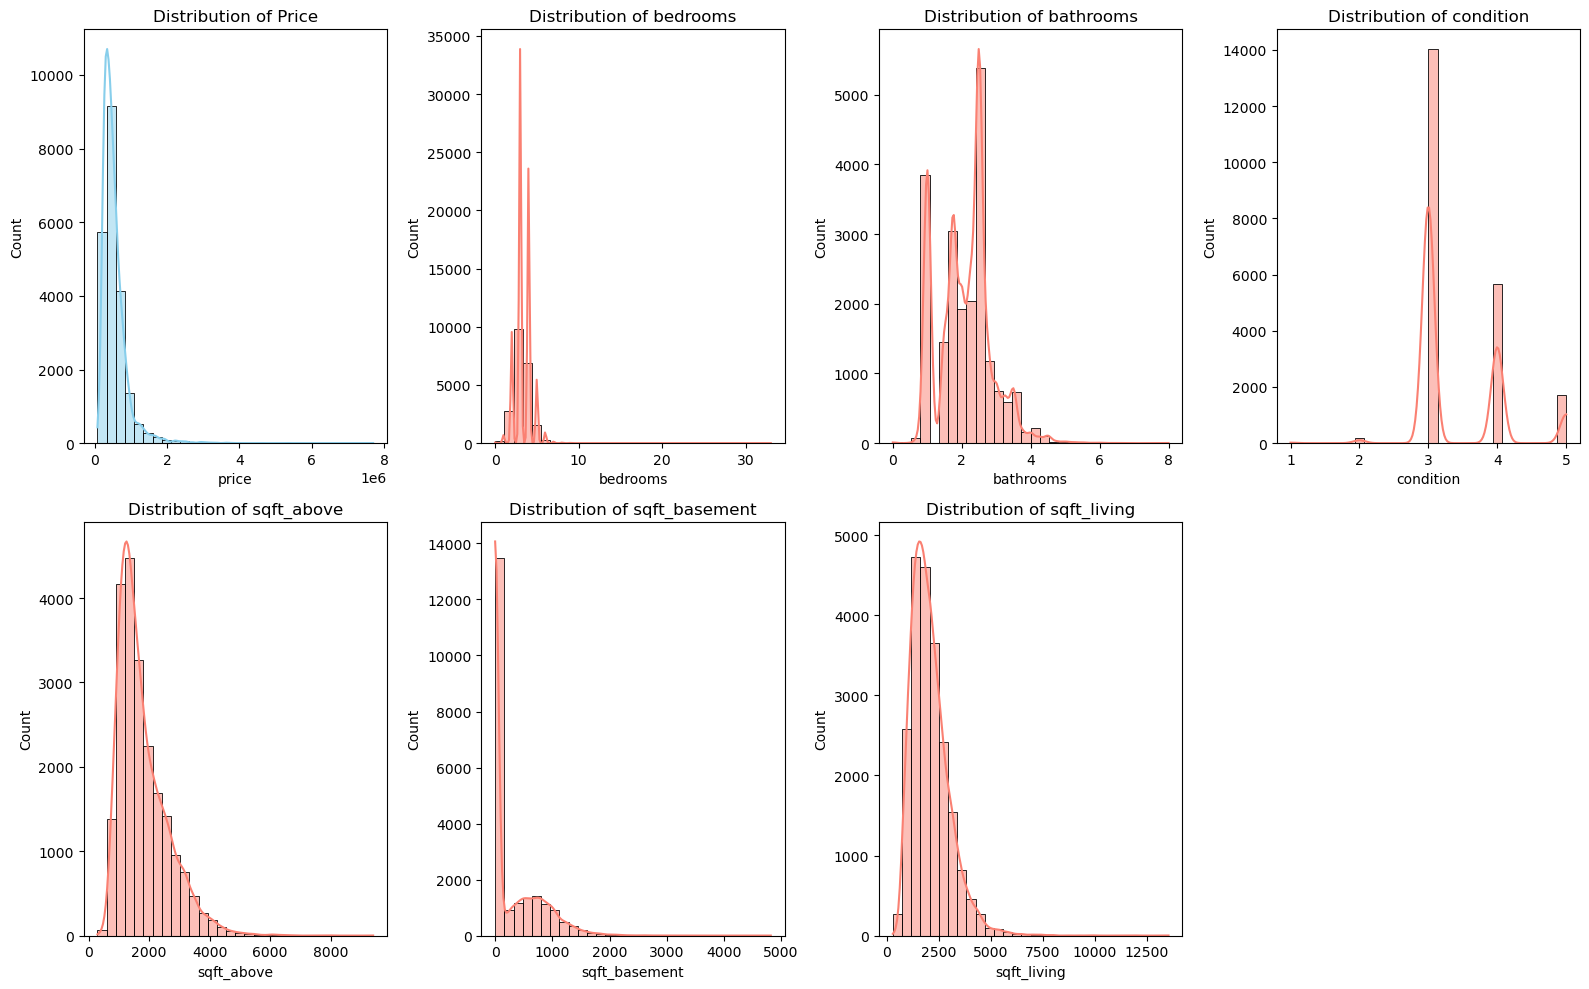

In [11]:
# Price Distribution (Histogram)
# Features and target
features = ['bedrooms', 'bathrooms', 'condition', 'sqft_above', 'sqft_basement', 'sqft_living']
target = 'price'


# Set up the figure
plt.figure(figsize=(16, 10))

# Plot target histogram
plt.subplot(2, 4, 1)
sns.histplot(cleaned_df[target], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Price')

# Plot feature histograms
for i, feature in enumerate(features, start=2):
    plt.subplot(2, 4, i)
    sns.histplot(cleaned_df[feature], kde=True, bins=30, color='salmon')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()







Price, square footage, and most numerical features are right-skewed: Most values are clustered at the lower end, with a few high-value outliers.

Bedrooms and bathrooms usually fall between 1 and 4: Few homes have very high counts.

Condition is categorical with clear peaks: Certain condition ratings are much more common.

Most homes have modest basement and above-ground areas: Very large or zero-area cases are rare but present.

### Bivariate Analysis using Boxplot

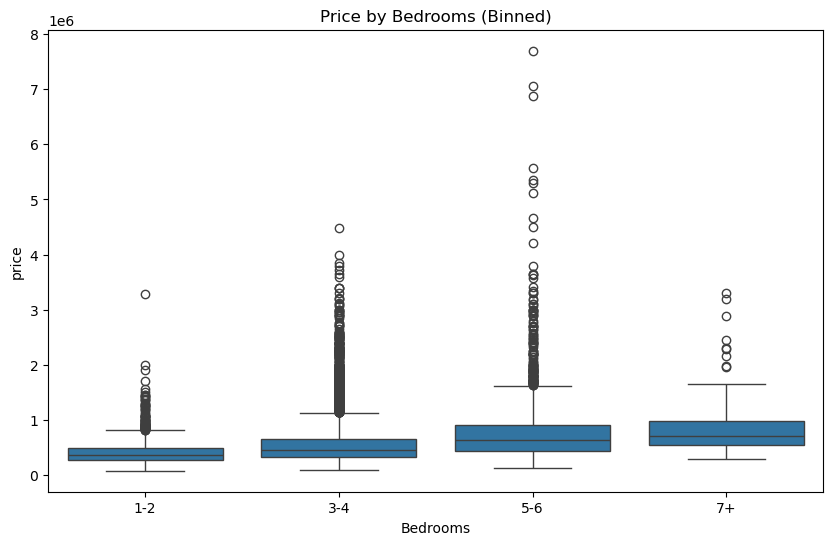

In [12]:
# Let's us start first by taking Bedrooms as our feature and Price as our target.

# If bedrooms is integer with many unique values, bin it
cleaned_df['bedrooms_binned'] = pd.cut(cleaned_df['bedrooms'], bins=[0, 2, 4, 6, cleaned_df['bedrooms'].max()], labels=['1-2', '3-4', '5-6', '7+'])

plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms_binned', y='price', data=cleaned_df)
plt.title('Price by Bedrooms (Binned)')
plt.xlabel('Bedrooms')
plt.show()





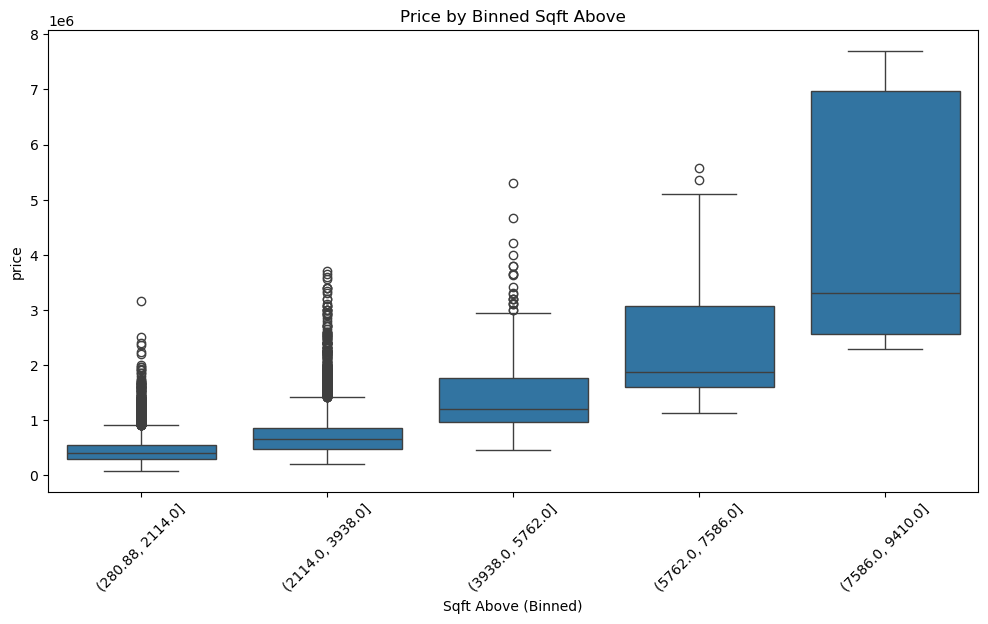

In [13]:
# Price vs Sqft_Above

# Bin sqft_above into 5 ranges
cleaned_df['sqft_above_binned'] = pd.cut(cleaned_df['sqft_above'], bins=5)

plt.figure(figsize=(12,6))
sns.boxplot(x='sqft_above_binned', y='price', data=cleaned_df)
plt.title('Price by Binned Sqft Above')
plt.xticks(rotation=45)
plt.xlabel('Sqft Above (Binned)')
plt.show()




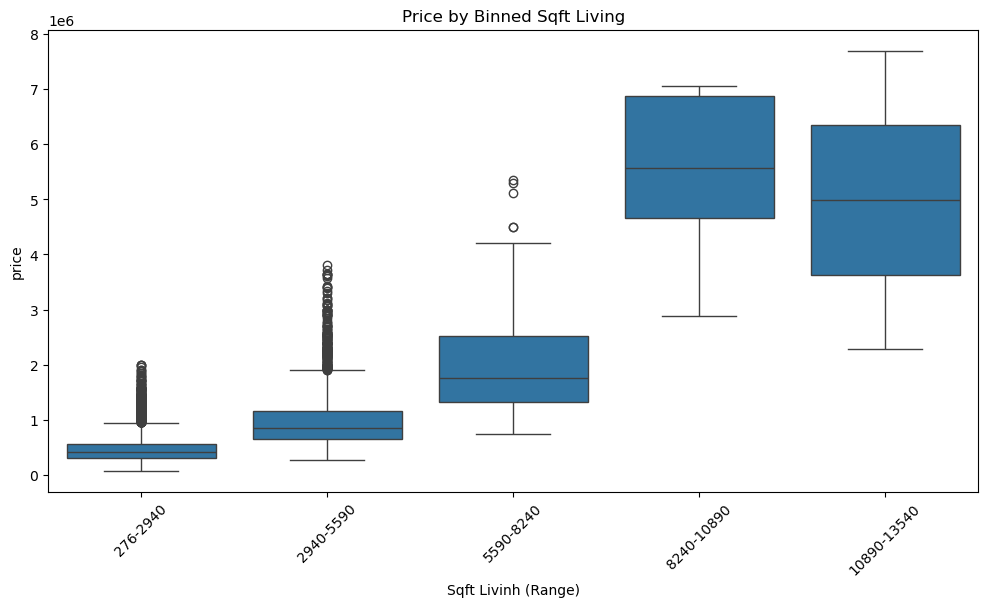

In [14]:
# Price vs sqft_living



# Create bins and labels using pd.cut with labels
bins = 5
bins_obj = pd.cut(cleaned_df['sqft_living'], bins=bins)

# Extract range labels as strings for readability
labels = [f'{int(interval.left)}-{int(interval.right)}' for interval in bins_obj.cat.categories]

# Assign these labels and ensure the Categorical is ordered for correct sorting
cleaned_df['sqft_living_binned'] = pd.cut(
    cleaned_df['sqft_living'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    ordered=True
)

plt.figure(figsize=(12, 6))
sns.boxplot(x='sqft_living_binned', y='price', data=cleaned_df)
plt.xticks(rotation=45)
plt.title('Price by Binned Sqft Living')
plt.xlabel('Sqft Livinh (Range)')
plt.show()


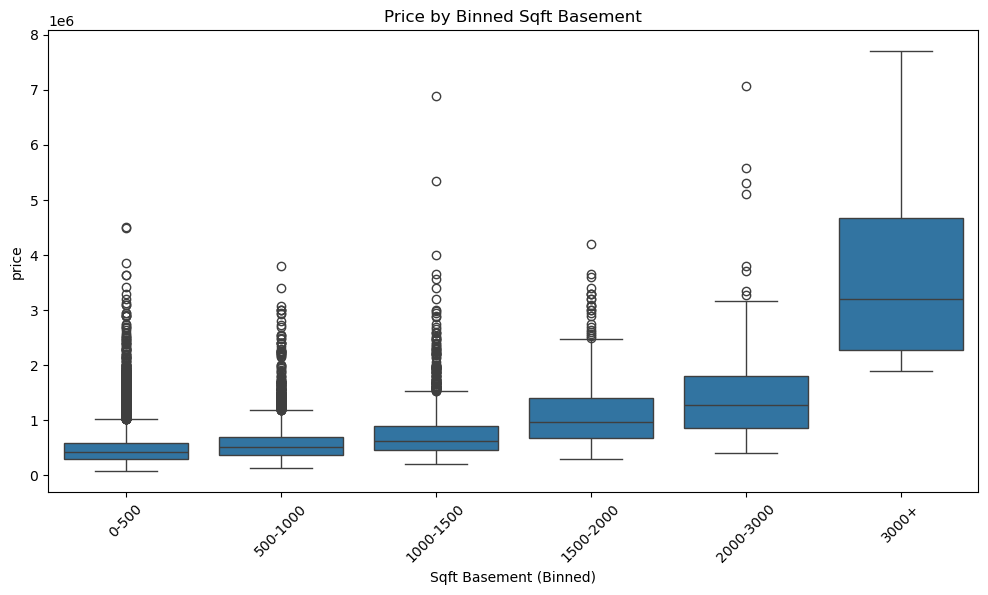

In [15]:
# Price vs Sqft_basement


# Define bins for sqft_basement (adjust bins as needed)


bin_edges = [0, 500, 1000, 1500, 2000, 3000, cleaned_df['sqft_basement'].max()]
bin_labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-3000', '3000+']

# Create binned category column
cleaned_df['sqft_basement_binned'] = pd.cut(cleaned_df['sqft_basement'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='sqft_basement_binned', y='price', data=cleaned_df)
plt.title('Price by Binned Sqft Basement')
plt.xlabel('Sqft Basement (Binned)')
plt.xticks(rotation=45)
plt.show()

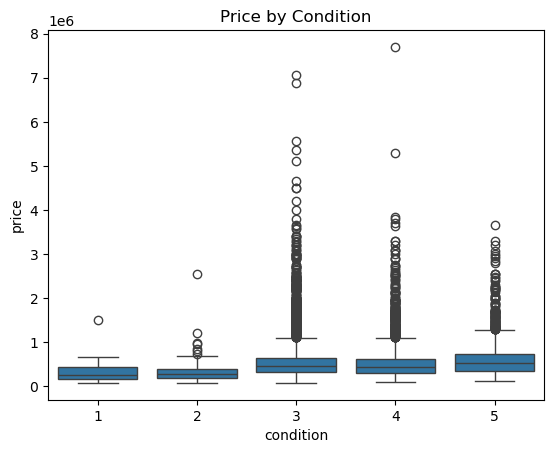

In [16]:
# Price vs Condition

sns.boxplot(x='condition', y='price', data=cleaned_df)
plt.title('Price by Condition')
plt.show()


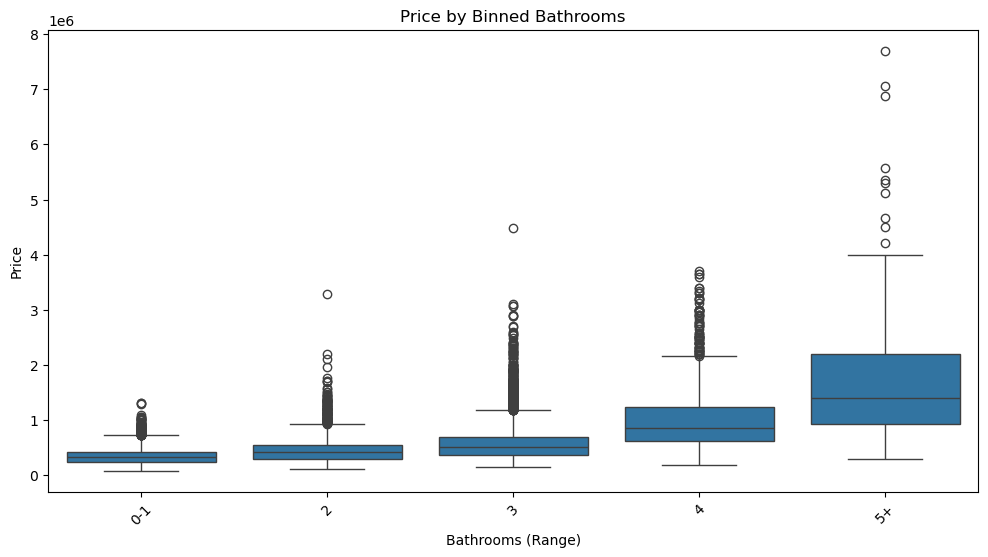

In [17]:
# Price vs Bathrooms

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define bathroom bins and labels for x-axis
bathroom_bins = [0, 1, 2, 3, 4, 10]
bathroom_labels = ['0-1', '2', '3', '4', '5+']
cleaned_df['bathrooms_binned'] = pd.cut(cleaned_df['bathrooms'], bins=bathroom_bins, labels=bathroom_labels, include_lowest=True, ordered=True)

plt.figure(figsize=(12, 6))
sns.boxplot(x='bathrooms_binned', y='price', data=cleaned_df)
plt.title('Price by Binned Bathrooms')
plt.xlabel('Bathrooms (Range)')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()



### Insights from our Boxplots

#### Insights from using Price as the target and features like bedrooms, bathrooms, sqft_above, sqft_basement, and condition based on typical analysis and boxplot interpretations:

Bedrooms: More bedrooms tend to increase median home price, but there is high variation within bedroom categories, indicating other factors influence price as well.

Bathrooms: Increasing number of bathrooms generally correlates with higher prices, with noticeable jumps in median price as bathrooms increase, but non-linearities and outliers exist.

Sqft Above Ground: Larger above-ground living area strongly correlates with higher home prices. Binning sqft helps reveal distinct groups showing stepwise price increases.

Sqft Basement: Basement size adds value, moderately correlates with price, especially when basement is present. Larger basements tend to have higher prices, but impact is less than above-ground living area.

Condition: Better overall condition categories show higher median house prices, signaling buyers’ preference and premium for well-maintained homes.

In summary, size-based features (sqft_above, sqft_basement), condition, and count features (bedrooms, bathrooms) all influence home price positively but with varying impact strength and some intra-category variability due to location, amenities, and other hidden factors.

### Let's remove the Outliers for more accuracy

In [18]:
def remove_outliers_iqr(df, features):
    for feature in features:
        # Convert column to numeric if not already (coerce errors to NaN)
        df[feature] = pd.to_numeric(df[feature], errors='coerce')
        
        # Drop NaNs that may appear after conversion
        df = df.dropna(subset=[feature])
        
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

numeric_features = ['bedrooms', 'condition','bathrooms', 'sqft_above', 'sqft_basement','sqft_living']
cleaned_no_outliers = remove_outliers_iqr(cleaned_df.copy(), numeric_features)



#### Removing outliers leads to clearer and more reliable insights by focusing on typical properties. Key benefits:

Price trends by bedrooms, bathrooms, sqft, and condition become smoother and more consistent.

Outliers no longer distort statistics or visualizations, improving interpretability.

Relationships between features and price strengthen, enhancing model accuracy.

Overall data quality improves, making analysis and predictions more trustworthy.

In short, outlier removal reveals realistic market patterns and stabilizes your data analysis.